accuracy:  0.95


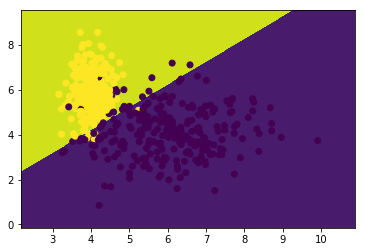

In [2]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')

x, y = make_classification(n_clusters_per_class=1, n_samples=500, n_redundant=0, n_features=2, random_state=14)
x = x + 5
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

nb = MultinomialNB().fit(x_train, y_train)
y_pred = nb.predict(x_test)

print('accuracy: ', accuracy_score(y_test, y_pred))

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
z = nb.predict(np.c_[xx.ravel(), yy.ravel()])
zz = z.reshape(xx.shape)

plt.contourf(xx, yy, zz)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred)

plt.show()